In [3]:
pip install opendatasets

Note: you may need to restart the kernel to use updated packages.


In [4]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/shanegerami/ai-vs-human-text/data')

Skipping, found downloaded files in "./ai-vs-human-text" (use force=True to force download)


In [5]:
import pandas as pd
import re
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [6]:
data = pd.read_csv("ai-vs-human-text/AI_Human.csv")
data.head(7)

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0
5,The electrol college system is an unfair syste...,0.0
6,"Dear state senator, It is the utmost respect t...",0.0


In [7]:
data['generated'].value_counts()

generated
0.0    305797
1.0    181438
Name: count, dtype: int64

In [8]:
data['generated'] = data['generated'].astype(int)

In [9]:
data.isnull().sum()

text         0
generated    0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   text       487235 non-null  object
 1   generated  487235 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.4+ MB


In [11]:
data['text'][777]

'Many of us are used to getting somewhere by simply using a car, but should we always use a car. If we limit car usage we can solve most of our problems. We can save comically and collect less polution In source one the German Suburbs are car free, where street parking, driveways, and home garages are forbidden generally. Car ownership is allowed, however where a carowner buys space for their car has to pay near 40,000, along with a home. As a result according to source one 70 percent of vaughn\'s families do not own cars , and 57 percent sold a car to move here. Many citizens complain when the gas prices go up, but if we limit our car usage we wont have to complain anymore. We will save money, because when we decrease the usage of cars we wont use as much gas or diesel. Heidrun Walter told Elisabeth Rosenthal that he now lives happier this way. Not only do we save money but we also relieve tension through out our bodies.\n\nHowever we may not enjoy this new idea of limiting car usage 

In [12]:
def clean_text(text):
    cleaning_pattern = r'[^a-zA-Z\s]'

    clean_text = re.sub(cleaning_pattern, '', text)

    clean_text = clean_text.replace('\n', ' ')

    clean_text = re.sub(r'\s+', ' ', clean_text)

    return clean_text.strip()

In [13]:
data['text'] = data['text'].apply(clean_text)

In [14]:
data['text']= data['text'].str.lower()

In [15]:
data['text'][777]

'many of us are used to getting somewhere by simply using a car but should we always use a car if we limit car usage we can solve most of our problems we can save comically and collect less polution in source one the german suburbs are car free where street parking driveways and home garages are forbidden generally car ownership is allowed however where a carowner buys space for their car has to pay near along with a home as a result according to source one percent of vaughns families do not own cars and percent sold a car to move here many citizens complain when the gas prices go up but if we limit our car usage we wont have to complain anymore we will save money because when we decrease the usage of cars we wont use as much gas or diesel heidrun walter told elisabeth rosenthal that he now lives happier this way not only do we save money but we also relieve tension through out our bodies however we may not enjoy this new idea of limiting car usage some of us actually enjoy driving but

In [16]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

data['tokenized_text'] = data['text'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
data.head()

,text,generated,tokenized_text
0,cars cars have been around since they became f...,0,"[cars, cars, have, been, around, since, they, ..."
1,transportation is a large necessity in most co...,0,"[transportation, is, a, large, necessity, in, ..."
2,americas love affair with its vehicles seems t...,0,"[americas, love, affair, with, its, vehicles, ..."
3,how often do you ride in a car do you drive a ...,0,"[how, often, do, you, ride, in, a, car, do, yo..."
4,cars are a wonderful thing they are perhaps on...,0,"[cars, are, a, wonderful, thing, they, are, pe..."


In [18]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
def remove_stopwords(tokens):
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

In [20]:
data['tokenized_text'] = data['tokenized_text'].apply(lambda x: remove_stopwords(x))

In [21]:
data['tokenized_text'][777]

['many',
 'us',
 'used',
 'getting',
 'somewhere',
 'simply',
 'using',
 'car',
 'always',
 'use',
 'car',
 'limit',
 'car',
 'usage',
 'solve',
 'problems',
 'save',
 'comically',
 'collect',
 'less',
 'polution',
 'source',
 'one',
 'german',
 'suburbs',
 'car',
 'free',
 'street',
 'parking',
 'driveways',
 'home',
 'garages',
 'forbidden',
 'generally',
 'car',
 'ownership',
 'allowed',
 'however',
 'carowner',
 'buys',
 'space',
 'car',
 'pay',
 'near',
 'along',
 'home',
 'result',
 'according',
 'source',
 'one',
 'percent',
 'vaughns',
 'families',
 'cars',
 'percent',
 'sold',
 'car',
 'move',
 'many',
 'citizens',
 'complain',
 'gas',
 'prices',
 'go',
 'limit',
 'car',
 'usage',
 'wont',
 'complain',
 'anymore',
 'save',
 'money',
 'decrease',
 'usage',
 'cars',
 'wont',
 'use',
 'much',
 'gas',
 'diesel',
 'heidrun',
 'walter',
 'told',
 'elisabeth',
 'rosenthal',
 'lives',
 'happier',
 'way',
 'save',
 'money',
 'also',
 'relieve',
 'tension',
 'bodies',
 'however',
 'may'

In [22]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens

data['lemmatized_text'] = data['tokenized_text'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
X = data['lemmatized_text']
y = data['generated']

In [24]:
data['generated'].value_counts()

generated
0    305797
1    181438
Name: count, dtype: int64

In [25]:
X = [' '.join(doc) for doc in X]

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
pipeline_xgboost = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('tfidf_transformer', TfidfTransformer()),
    ('xgboost', XGBClassifier()) 
])

In [28]:
pipeline_xgboost.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('tfidf_transformer', TfidfTransformer()),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [29]:
y_pred_xgboost = pipeline_xgboost.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

accuracy = accuracy_score(y_test, y_pred_xgboost)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_xgboost, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.9946021940131559
Precision: 0.9946110372252687
Recall: 0.9946021940131559
F1 Score: 0.9945979362627055


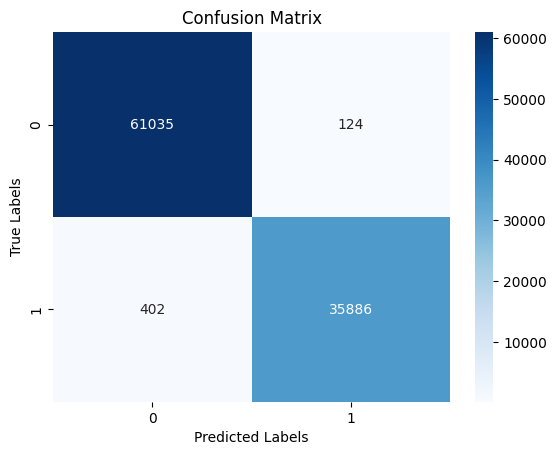

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_xgboost)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.show()

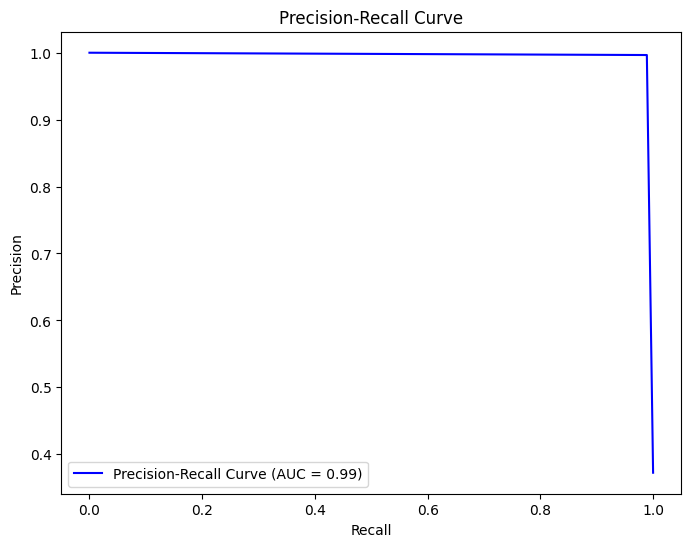

In [33]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, _ = precision_recall_curve(y_test, y_pred_xgboost)
auc_score = auc(recall, precision)


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

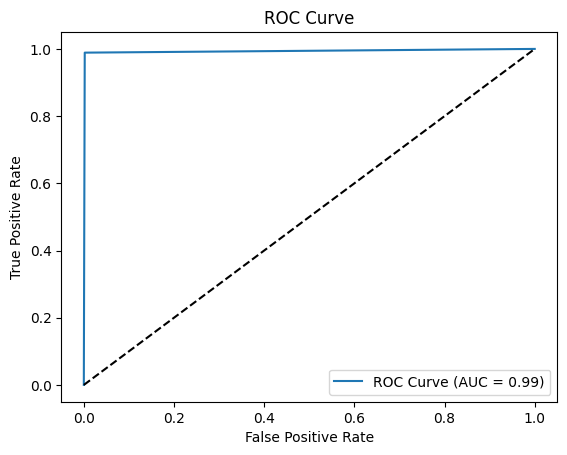

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgboost)
auc = roc_auc_score(y_test, y_pred_xgboost)

plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [35]:
pipelines = {
    "XGBoost": pipeline_xgboost
}
input_text = [
    "Sitting beneath the shade of an apple tree on a sunny day, a child with a book of fairy tales found solace. Lost in the pages, a bird's cheerful melody pierced the tranquility nearby. Enveloped by the sounds of nature, the child drifted into a world of fantasy."
]
# Loop through each pipeline name and test it
for name, pipeline in pipelines.items():
    # Predict class and probabilities using the current pipeline
    predicted_class = pipeline.predict(input_text)
    predicted_probabilities = pipeline.predict_proba(input_text)

    print(f"\nResults for pipeline: {name}")
    if predicted_class[0] == 0:
        print("Predicted class: Human")
    elif predicted_class[0] == 1:
        print("Predicted class: AI")
    print("Probability of being Human:", predicted_probabilities[0][0])
    print("Probability of being AI:", predicted_probabilities[0][1])


Results for pipeline: XGBoost
Predicted class: AI
Probability of being Human: 0.13361096
Probability of being AI: 0.86638904
